In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
from pathlib import Path
import importlib

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#Filepaths relative to module directory
NOTEBOOK_DIR = Path.cwd()    
TOP_DIR = NOTEBOOK_DIR.parent
LIB_DIR = TOP_DIR / "python"
DATA_DIR = TOP_DIR/'data_files'

#For displaying .pdfs 
from IPython.display import IFrame

def display_pdf(pdf_path, width="100%", height="600px"):
    """Displays a PDF file within a Jupyter Notebook cell."""
    return IFrame(src=pdf_path, width=width, height=height)

#Print text file with colored line numbers
from colored import Fore, Back, Style, fore, back, style, attr

def display_file_with_colored_line_numbers(filepath, color=Fore.red):
    """
    Displays a text file with colored line numbers in a Jupyter Notebook.
    """
    try:
        with open(filepath, 'r') as f:
            for i, line in enumerate(f, 1):
                colored_line_num = f"{color}{i:4d}{attr(0)}{Style.reset}"  # Format line number
                print(f"{colored_line_num}: {line.rstrip()}") # Print line number and content
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")

#general libraries used
import numpy as np
import pandas as pd
import importlib as imp


In [2]:
th232_Cu_chain = pd.read_csv("SNOLAB_Flux/data/Th232_Cu_summary_1ppb_260116.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         sep='\s+')
print (th232_Cu_chain.head(10))



   Energy  a,n          S.F.         Total
0     9.9  0.0  1.779000e-19  1.779000e-19
1     9.8  0.0  2.019000e-19  2.019000e-19
2     9.7  0.0  2.289000e-19  2.289000e-19
3     9.6  0.0  2.575000e-19  2.575000e-19
4     9.5  0.0  2.922000e-19  2.922000e-19
5     9.4  0.0  3.291000e-19  3.291000e-19
6     9.2  0.0  4.207000e-19  4.207000e-19
7     9.1  0.0  4.753000e-19  4.753000e-19
8     9.0  0.0  5.364000e-19  5.364000e-19
9     8.9  0.0  6.047000e-19  6.047000e-19


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/qs/y0dxxqrn4rd_pc96p6hnq51w0000gn/T/ipykernel_50877/1403946556.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+')


In [3]:
th232CuchainEn = np.asarray(th232_Cu_chain['Energy'],dtype=float)
th232CuchainRn = np.asarray(th232_Cu_chain['Total'],dtype=float)
th232CuchainANRn = np.asarray(th232_Cu_chain['a,n'],dtype=float)
th232CuchainSFRn = np.asarray(th232_Cu_chain['S.F.'],dtype=float)

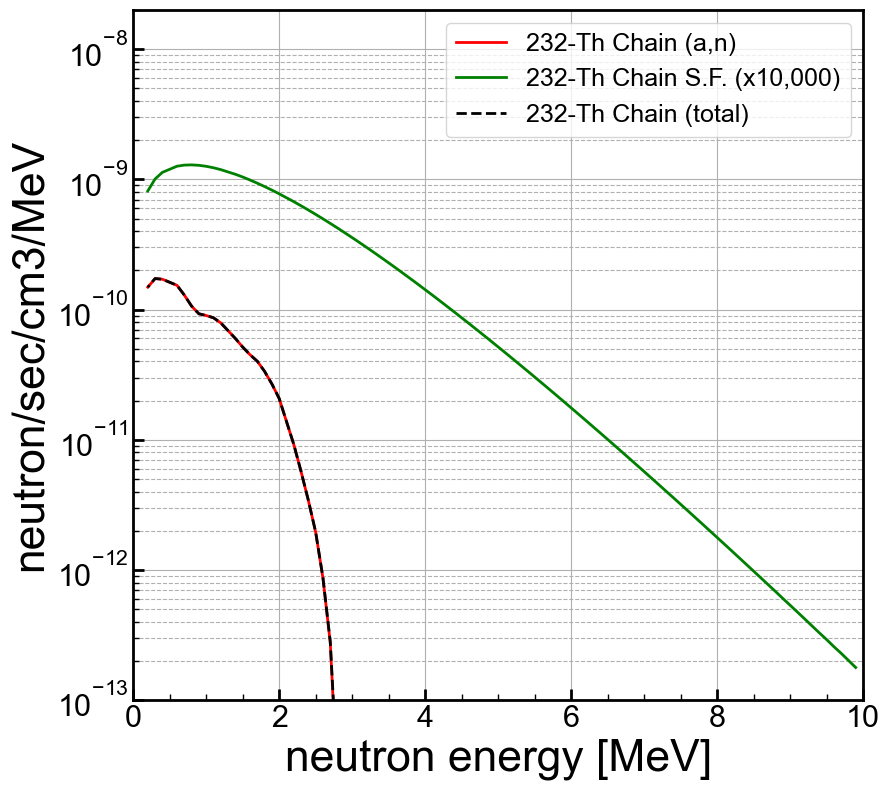

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(th232CuchainEn)[0])


ax1.plot(th232CuchainEn, th232CuchainANRn/width,color='r',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(th232CuchainEn, 100000*th232CuchainSFRn/width,color='g',linestyle='-',label="232-Th Chain S.F. (x10,000)")
ax1.plot(th232CuchainEn, th232CuchainRn/width,color='k',linestyle='--',label="232-Th Chain (total)")


ymin = 1e-13
ymax = 2e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/Th_Cu.png')
plt.show()

In [5]:
%%capture
u238_Cu_chain = pd.read_csv("SNOLAB_Flux/data/U238_Cu_summary_1ppb_260116.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         sep='\s+')
print (u238_Cu_chain.head(10))

u235_Cu_chain = pd.read_csv("SNOLAB_Flux/data/U235_Cu_summary_1ppb_260116.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         sep='\s+')
print (u235_Cu_chain.head(10))


In [6]:
u238_frac=0.9927
u235_frac=0.0072

u238CuchainEn = np.asarray(u238_Cu_chain['Energy'],dtype=float)
u238CuchainRn = np.asarray(u238_frac*u238_Cu_chain['Total'],dtype=float)
u238CuchainANRn = np.asarray(u238_frac*u238_Cu_chain['a,n'],dtype=float)
u238CuchainSFRn = np.asarray(u238_frac*u238_Cu_chain['S.F.'],dtype=float)

u235CuchainEn = np.asarray(u235_Cu_chain['Energy'],dtype=float)
u235CuchainRn = np.asarray(u235_frac*u235_Cu_chain['Total'],dtype=float)
u235CuchainANRn = np.asarray(u235_frac*u235_Cu_chain['a,n'],dtype=float)
u235CuchainSFRn = np.asarray(u235_frac*u235_Cu_chain['S.F.'],dtype=float)

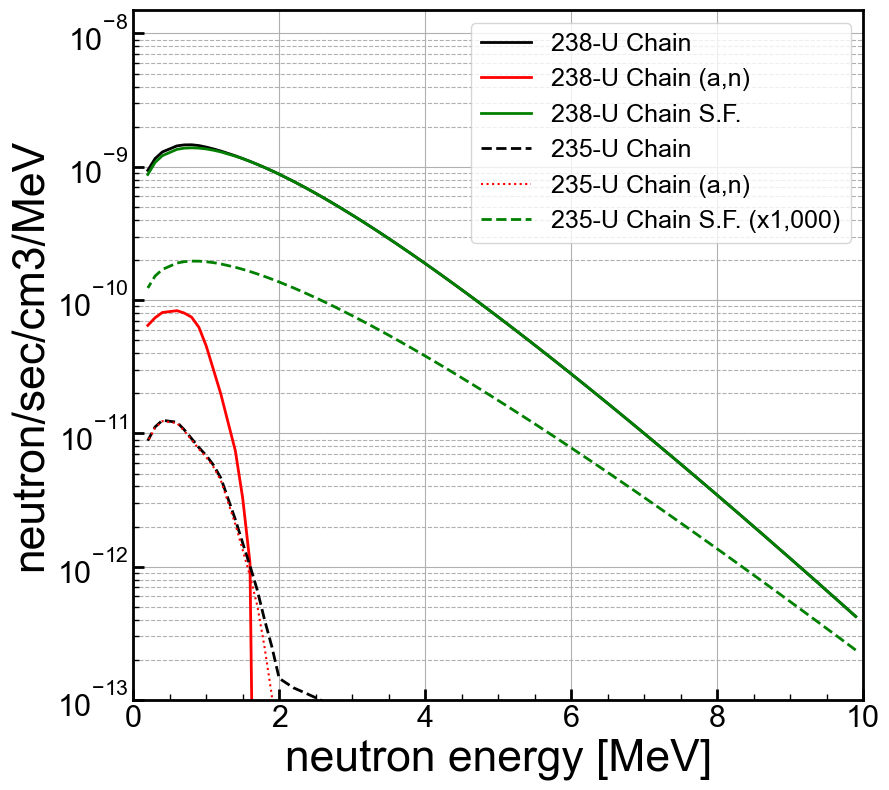

In [7]:


#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(u238CuchainEn)[0])
      

ax1.plot(u238CuchainEn, u238CuchainRn/width,color='k',linestyle='-',label="238-U Chain")
ax1.plot(u238CuchainEn, u238CuchainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238CuchainEn, u238CuchainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")

ax1.plot(u235CuchainEn, u235CuchainRn/width,color='k',linestyle='--',label="235-U Chain")
ax1.plot(u235CuchainEn, u235CuchainANRn/width,color='r',linestyle=':',label="235-U Chain (a,n)", linewidth=1.5)
ax1.plot(u235CuchainEn, 1000*u235CuchainSFRn/width,color='g',linestyle='--',label="235-U Chain S.F. (x1,000)")


ymin = 1e-13
ymax = 1.5e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/U_Cu.png')
plt.show()

